### ***Importing  libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ***Loading the dataset***

In [2]:
data = pd.read_csv('/content/titanic_dataset _assgnmnt.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = data.drop(['PassengerId'],axis=1)

## ***Pre-Procsessing***

In [5]:
data.shape

(891, 11)

In [6]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ***Handling Misiing Values***

In [9]:
# Checking for missing values

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

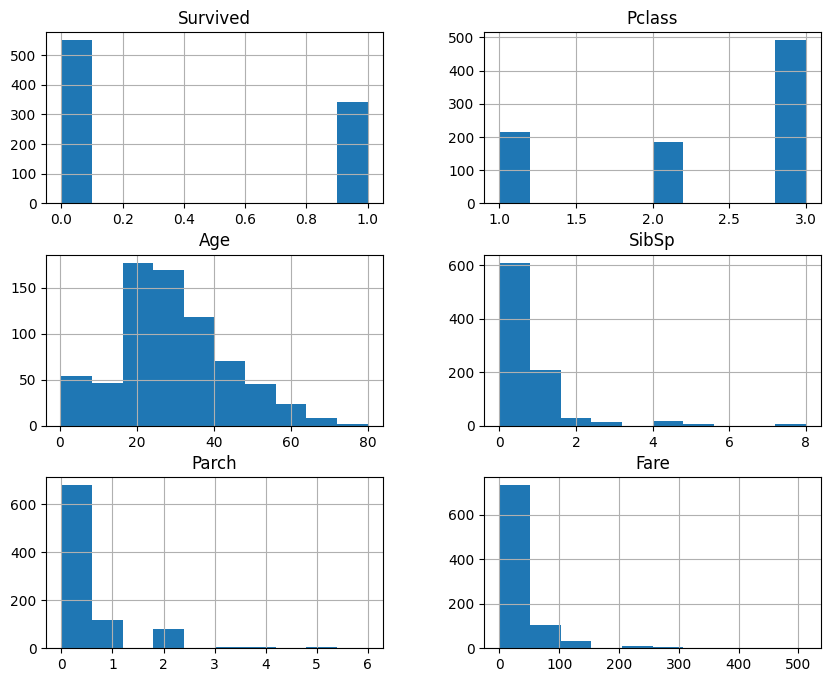

In [10]:
# Plotting the graph for numerical column

graph = data.select_dtypes(include=['float64', 'int64'])
graph.hist(figsize=(10,8))
plt.show()

In [11]:
# Handling missing value
# Age column had a skewed distribution so median filling
# Cabin and Embarked are categorical columns, so mode filling

data['Age'] = data['Age'].fillna(data['Age'].median())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### ***Handling Outliers***

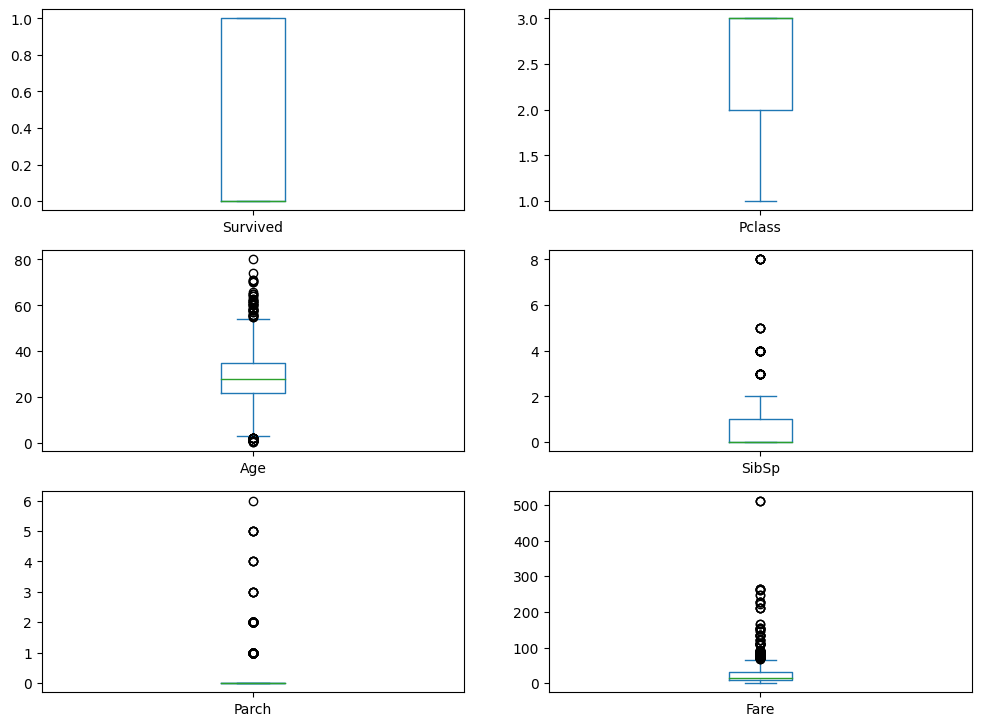

In [13]:
data.plot(kind='box', figsize= (12,12), layout= (4,2), sharex= False, subplots= True);

In [14]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
columns = ['Age', 'SibSp', 'Parch','Fare']

def handle_outliers(data, columns):
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    # clipping
    data[x] = data[x].clip(lower=lower_lim, upper=upper_lim)
    outliers = data[(data[x] < lower_lim) | (data[x] > upper_lim)]

  return data


data = handle_outliers(data,columns)

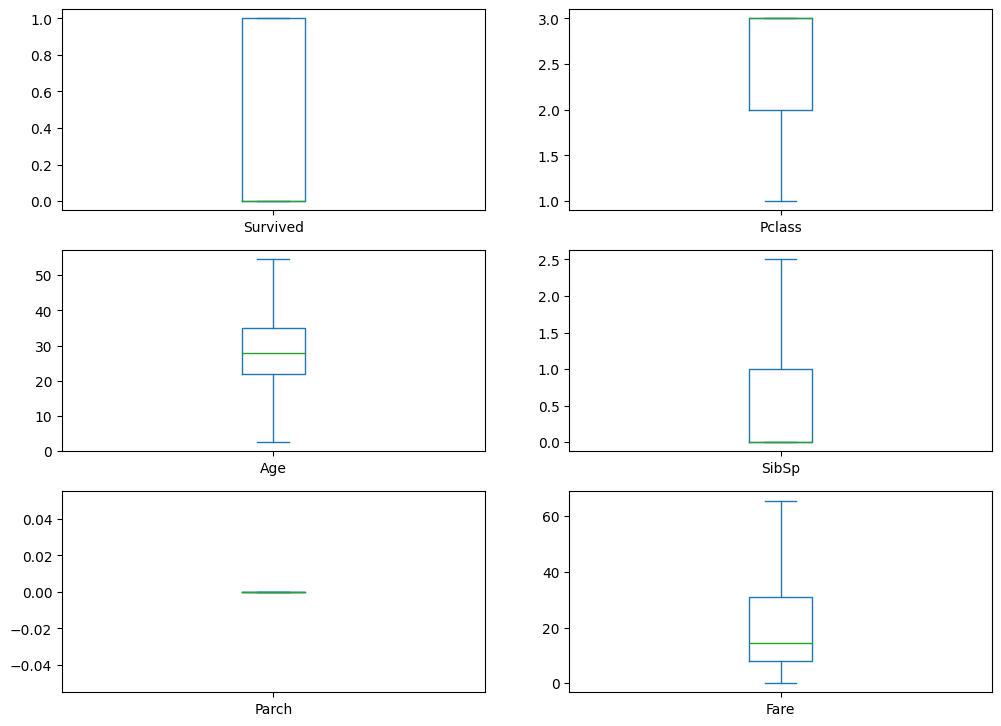

In [16]:
data.plot(kind='box', figsize= (12,12), layout= (4,2), sharex= False, subplots= True);

In [17]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          65
SibSp         4
Parch         1
Ticket      681
Fare        204
Cabin       147
Embarked      3
dtype: int64

In [18]:
# Dropping unwanted columns

data = data.drop(['Name','Ticket','Cabin'],axis= 1)

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S


<ipython-input-20-8fc5990d5bd4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')


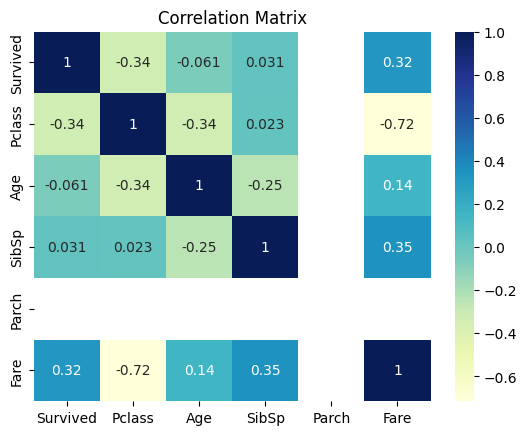

In [20]:
# Checking Correlation before encoding

sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

### ***Encoding***

In [21]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [23]:
data = pd.get_dummies(data)

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1.0,0,7.2500,0,0,1
1,1,1,0,38.0,1.0,0,65.6344,1,0,0
2,1,3,0,26.0,0.0,0,7.9250,0,0,1
3,1,1,0,35.0,1.0,0,53.1000,0,0,1
4,0,3,1,35.0,0.0,0,8.0500,0,0,1


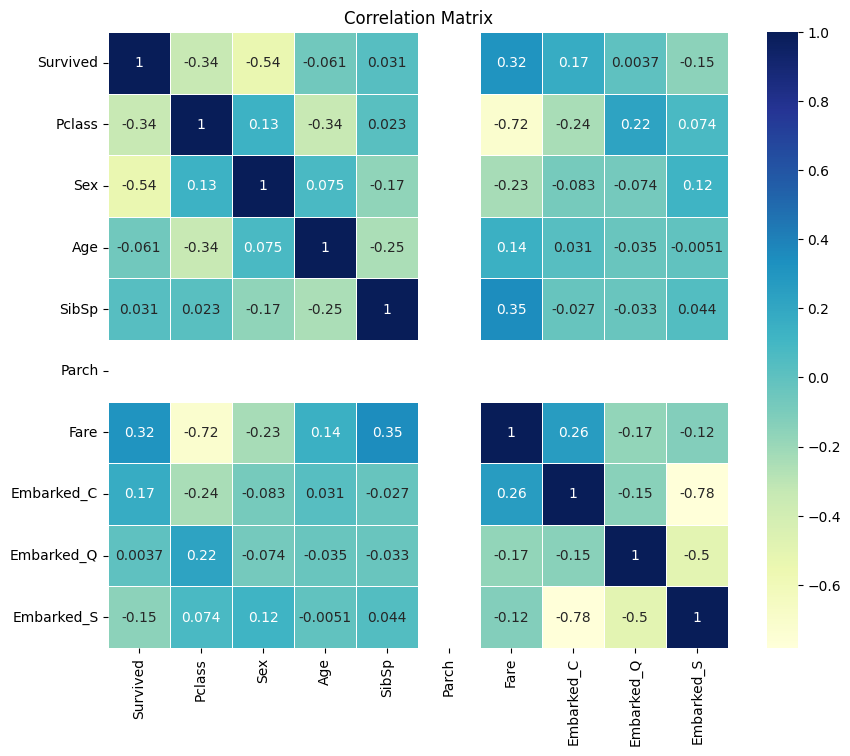

In [25]:
# Checking correlation after encoding

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

### ***Splitting Data into Features and Target Variable***

In [26]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.33)

## ***K- Nearest Neighbors (KNN)***

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [29]:
# hyperparameter tuning


metric_k=[]
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=2)
  knn_model = classifier.fit(X_train, y_train)
  y_pred_knn = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_knn)
  metric_k.append(accuracy)


In [30]:
best_k = neighbors[np.argmax(metric_k)]
best_accuracy = max(metric_k)

print("Best k value:", best_k)
print("Corresponding Accuracy:", best_accuracy)

Best k value: 7
Corresponding Accuracy: 0.7254237288135593


Text(0, 0.5, 'Accuracy')

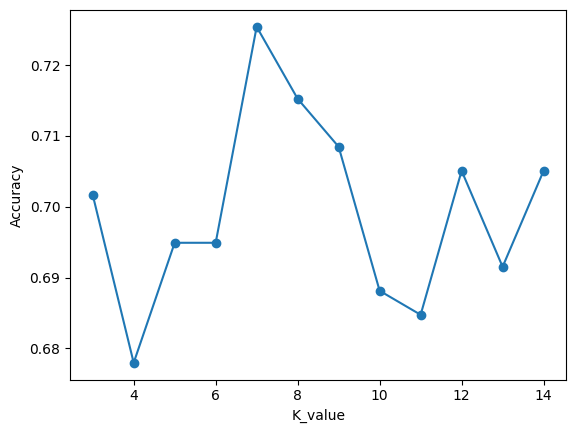

In [31]:
# plotting a line graph showing the relationship between the number of neighbors (k) and the corresponding accuracy

plt.plot(neighbors, metric_k, 'o-' )
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [32]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p=2)
  knn_model = classifier.fit(X_train, y_train)
  y_pred_knn = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_knn)
  metric_k.append(accuracy)

In [33]:
# Evaluate kNN model
print('Accuracy :',accuracy_score(y_test,y_pred_knn))
print('Precision :',precision_score(y_test,y_pred_knn))
print('recall :',recall_score(y_test,y_pred_knn))
print('F1 :',f1_score(y_test,y_pred_knn))

Accuracy : 0.7254237288135593
Precision : 0.7010309278350515
recall : 0.5666666666666667
F1 : 0.6267281105990783


### ***Cross-validation for k-nearest neighbors (KNN)***

In [34]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Define number of folds
num_folds = 10

# Create k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create stratified k-fold cross-validation object
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
kfold_cv_scores_knn = cross_val_score(knn_model, X, y, cv=kfold, scoring='accuracy')

# Perform stratified k-fold cross-validation
stratified_kfold_cv_scores_knn = cross_val_score(knn_model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("K-Fold Cross-Validation Scores:", kfold_cv_scores_knn)
print("Stratified K-Fold Cross-Validation Scores:", stratified_kfold_cv_scores_knn)

# Calculate and print the average accuracy
avg_accuracy_kfold = kfold_cv_scores_knn.mean()
avg_accuracy_stratified_kfold = stratified_kfold_cv_scores_knn.mean()

print("-------------------------------Average Accuracy Score of the Model---------------------")
print("Average Accuracy (K-Fold):", avg_accuracy_kfold)
print("Average Accuracy (Stratified K-Fold):", avg_accuracy_stratified_kfold)

K-Fold Cross-Validation Scores: [0.73333333 0.66292135 0.65168539 0.69662921 0.69662921 0.70786517
 0.65168539 0.74157303 0.71910112 0.75280899]
Stratified K-Fold Cross-Validation Scores: [0.73333333 0.71910112 0.75280899 0.6741573  0.64044944 0.7752809
 0.70786517 0.75280899 0.70786517 0.68539326]
-------------------------------Average Accuracy Score of the Model---------------------
Average Accuracy (K-Fold): 0.7014232209737827
Average Accuracy (Stratified K-Fold): 0.7149063670411985


### ***Support Vector Machine***

In [35]:
from sklearn.svm import SVC

# create svm classifier object
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

# Make prediction
y_pred_svm = svm_model.predict(X_test)

print (confusion_matrix(y_test, y_pred_svm))

[[151  24]
 [ 36  84]]


In [36]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm))
print('Precision :',precision_score(y_test,y_pred_svm))
print('recall :',recall_score(y_test,y_pred_svm))
print('F1 :',f1_score(y_test,y_pred_svm))

Accuracy : 0.7966101694915254
Precision : 0.7777777777777778
recall : 0.7
F1 : 0.7368421052631577


### ***Cross-validation for SVM***

In [37]:
# Define number of folds
num_folds = 10

# Create k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create stratified k-fold cross-validation object
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
kfold_cv_scores_svm = cross_val_score(svm_model, X, y, cv=kfold, scoring='accuracy')

# Perform stratified k-fold cross-validation
stratified_kfold_cv_scores_svm = cross_val_score(svm_model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("K-Fold Cross-Validation Scores:", kfold_cv_scores_svm)
print("Stratified K-Fold Cross-Validation Scores:", stratified_kfold_cv_scores_svm)

# Calculate and print the average accuracy
avg_accuracy_kfold = kfold_cv_scores_svm.mean()
avg_accuracy_stratified_kfold = stratified_kfold_cv_scores_svm.mean()

print("-------------------------------Average Accuracy Score of the Model---------------------")
print("Average Accuracy (K-Fold):", avg_accuracy_kfold)
print("Average Accuracy (Stratified K-Fold):", avg_accuracy_stratified_kfold)

K-Fold Cross-Validation Scores: [0.81111111 0.75280899 0.80898876 0.71910112 0.85393258 0.83146067
 0.73033708 0.74157303 0.75280899 0.86516854]
Stratified K-Fold Cross-Validation Scores: [0.83333333 0.74157303 0.78651685 0.76404494 0.76404494 0.80898876
 0.75280899 0.7752809  0.82022472 0.82022472]
-------------------------------Average Accuracy Score of the Model---------------------
Average Accuracy (K-Fold): 0.7867290886392009
Average Accuracy (Stratified K-Fold): 0.7867041198501872


In [38]:
models = pd.DataFrame({
    'Model': ['KNN (kfold)', 'KNN (stratified kfold)','Support Vector Machines(kfold)', 'Support Vector Machines (Stratified kfold)'],

    'Score': [kfold_cv_scores_knn.mean(), stratified_kfold_cv_scores_knn.mean(),
              kfold_cv_scores_svm.mean(), stratified_kfold_cv_scores_svm.mean()]})

models.sort_values(by='Score',ascending=False)

,Model,Score
2,Support Vector Machines(kfold),0.786729
3,Support Vector Machines (Stratified kfold),0.786704
1,KNN (stratified kfold),0.714906
0,KNN (kfold),0.701423
